<a href="https://colab.research.google.com/github/Maystrix/Cardiovascular-CHD-Risk_Prediction/blob/main/Capstone_III_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification/ Cardiovascular Risk Prediction
##### **Contribution**    - Individual/Team


# **Project Summary -**

*The dataset contained information of over 3000 patients with different medical histories.For better interpretability of data ,age group was divided into 3 classes 'young, middle, old age' . Heart rates were classified based on their Hypertension severity into 'Normal, Elevated, Stage_1, Stage_2, Crisis, Isolated systolic , Isolated diastolic' on the basis systolic and diastolic Blood Pressures & Cholestrol levels were classified into 'Normal, Elevated, High risk'.Several features were interlinked to each other based on their usage and measures , which were further understood by visualizing their effect on CHD risk for patients. Null values were removed since we can't and should not make assumptions wrt medical conditions of patients . Some features were heavily influenced by outliers which can affect the model prediction hence they were handled using Inter-quartile Range (IQR) method. Further some categorical features were encoded using label encoding while rest were encoded using One-hot-df method as they contained multiple values , which are better understood when converted into dummies. For checking and handling multicollinearity Variance inflation factor(VIF) method was used to remove correlated independent variables. Since, the data was heavily imbalanced Synthetic Minority Oversampling Technique (SMOTE) was used to generate synthetic samples from the minority class. Before model implementation , dataset was Standardized using StandardScaler method since,the dataset is mostly normally distributed & it mantains information about outliers and makes model less sensitive. 6 models were implemented and some with below-par score underwent hypertuning for better results. Random Forest made the best predictions with an F1-score and test-accuracy of 90 %. Age , Heart rate  and  were the top features used by the model for data interpretation.* 

# **GitHub Link -**

https://github.com/Maystrix/Cardiovascular-CHD-Risk_Prediction

# **Problem Statement**


*The dataset is from an ongoing cardiovascular study on residents of town of Framingham , Massacheutts. The classification goal is to predct whether the patient has a 10-year risk of future coronary heart disease(CHD). The dataset provides the patients information. It includes over 4000 records and has 15 attributes . Each attribute is a potential risk factor. There are both demographic , behavioral and medical risk factors.*

# ***Let's Begin !***

## ***1. Know Your Data***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


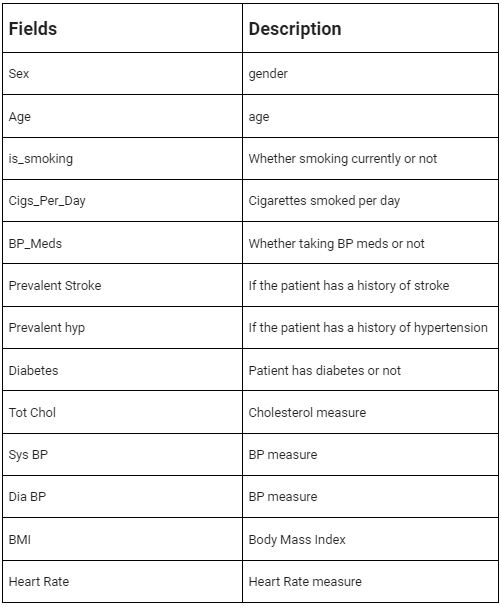

### Import Libraries

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score, accuracy_score, precision_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Classification/data_cardiovascular_risk.csv")

In [ ]:
cvd_df = df.copy()

### Dataset First View

In [ ]:
# Dataset First Look
cvd_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("(Rows, columns) : " + str(cvd_df.shape))

(Rows, columns) : (3390, 17)


### Dataset Information

In [ ]:
# Dataset Info
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
cvd_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
cvd_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

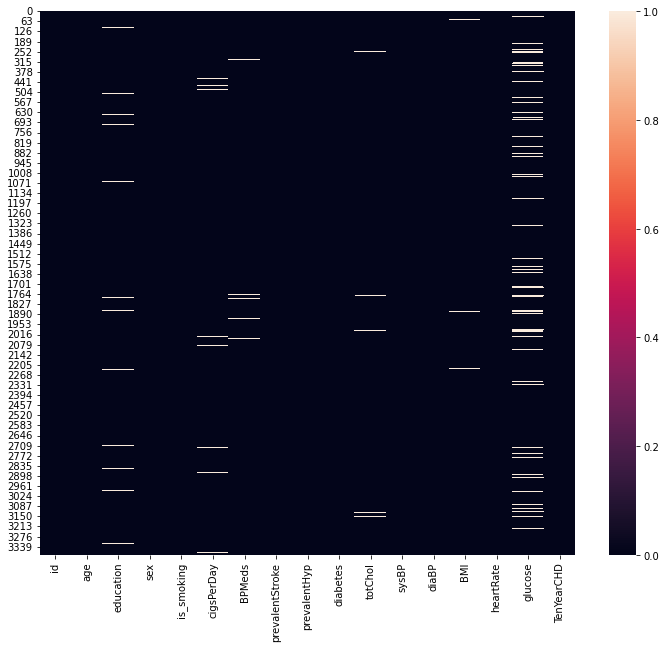

In [ ]:
# Visualizing the missing values
missing_values = cvd_df.isnull()
plt.figure(figsize=(12,10))
sns.heatmap(missing_values)

### What did you know about your dataset?

*The dataset contains over 3390 columns ,some of the columns contains many null values which need to be handled for better interpretability of dataset and better model prediction*

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
cvd_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
cvd_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


### Variables Description 

*From the variables description , it can be seen that the dataset contains information of people aged greater than 32 and mostly is focued on older people in the age group of 45 and above and it is mostly female centric*

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in cvd_df:
    print(col ,":\n", cvd_df[col].unique())

id :
 [   0    1    2 ... 3387 3388 3389]
age :
 [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
education :
 [ 2.  4.  1.  3. nan]
sex :
 ['F' 'M']
is_smoking :
 ['YES' 'NO']
cigsPerDay :
 [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
BPMeds :
 [ 0. nan  1.]
prevalentStroke :
 [0 1]
prevalentHyp :
 [0 1]
diabetes :
 [0 1]
totChol :
 [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260. 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165.
 302. 265. 251. 205. 209. 258. 222. 247. 189. 173. 281. 382. 181. 200.
 244. 218. 261. 229. 291. 312. 170. 176. 290. 204. 239. 162. 314. 194.
 271. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
cvd_df.drop(['id'], axis=1, inplace=True)

* Target Variable Analysis

In [ ]:
cvd_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

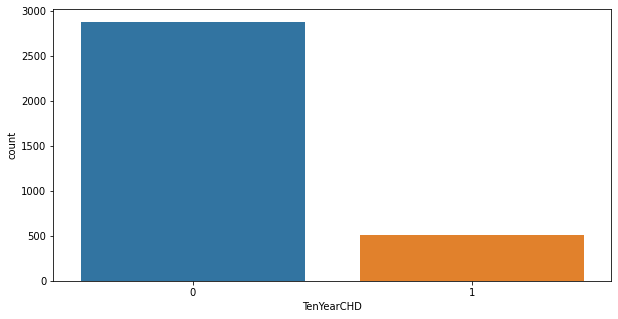

In [ ]:
#check target variable value proportion
plt.figure(figsize=(10,5))
sns.countplot(x = 'TenYearCHD', data = cvd_df)

In [ ]:
cvd_df['TenYearCHD'].value_counts(normalize=True)

0    0.849263
1    0.150737
Name: TenYearCHD, dtype: float64

*15 % of the population from dataset have high risk of heart disease*

In [ ]:
#defining age group to dataset

def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [ ]:
#Applying converted data into our dataset with new column - Age_Range

cvd_df['Age_Group']= cvd_df['age'].apply(age_range)
cvd_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age_Group
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,Elder Age
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Young Age
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,Middle Age
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Middle Age
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,Elder Age


* Checking Skewness

In [ ]:
categorical_features = [i for i in cvd_df.columns if cvd_df[i].nunique()<=4]
categorical_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD',
 'Age_Group']

In [ ]:
numerical_features = [i for i in cvd_df.columns if i not in categorical_features]
numerical_features

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

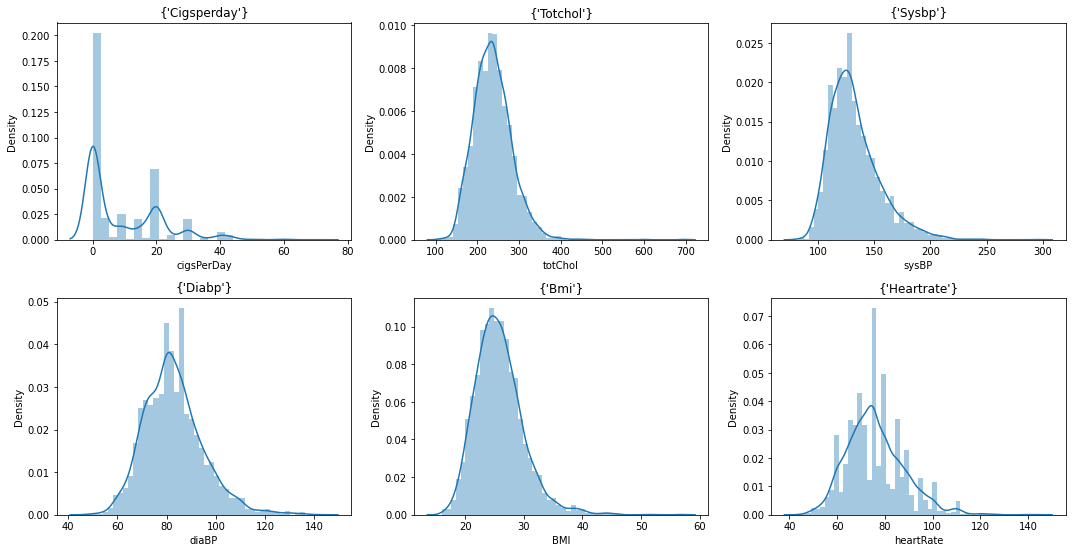

In [ ]:
plt.figure(figsize=(15,15))
for n, col in enumerate(numerical_features[1:-1]):
  plt.subplot(4,3, n+1)
  sns.distplot((cvd_df[col]))
  plt.title({col.title()})
  plt.tight_layout()

* Heart Rate classification

In [ ]:
def heart_rate(sysBP, diaBP):
  if sysBP <= 120 and diaBP <=80:
    return 'Normal BP'
  elif sysBP <= 129 and diaBP <= 80:
    return 'Elevated BP'
  elif sysBP <= 139 and diaBP <=90:
    return 'Stage_1'
  elif sysBP <= 179 and diaBP <120:
    return 'Stage_2'
  elif sysBP >= 180 or diaBP >=120: 
    return 'Crisis'
  elif sysBP >=125 and diaBP >= 90:
    return 'Isolated Diastolic'
  elif sysBP >= 140 and diaBP < 90:
    return 'Isolated Systolic'


In [ ]:
cvd_df['Hypertension']= cvd_df.apply(lambda  x: heart_rate(x['sysBP'], x['diaBP']), axis=1 )


In [ ]:
cvd_df['Hypertension'].value_counts()

Stage_2               1034
Normal BP              942
Stage_1                935
Elevated BP            334
Crisis                 143
Isolated Diastolic       2
Name: Hypertension, dtype: int64

* Diabetes V/s Cholestrol

In [ ]:
def cholestrol_lvl(totChol):
  if totChol < 200:
    return 'Normal'
  elif totChol > 200 and totChol < 240 :
    return 'Elevated'
  else :
    return 'High_Risk'

In [ ]:
cvd_df['Cholestrol'] = cvd_df['totChol'].apply(cholestrol_lvl)

In [ ]:
cvd_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age_Group,Hypertension,Cholestrol
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,Elder Age,Stage_2,Elevated
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Young Age,Stage_2,Elevated
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,Middle Age,Normal BP,High_Risk
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Middle Age,Stage_2,Elevated
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,Elder Age,Stage_1,High_Risk


### What all manipulations have you done and insights you found?

*15 % of the population have heart disease. The age column is divided into 3 groups, heart rates are classified based on Hypertension risk and risk of CHD is calculated on the basis of Cholestrol level for better interpretability of data.*

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

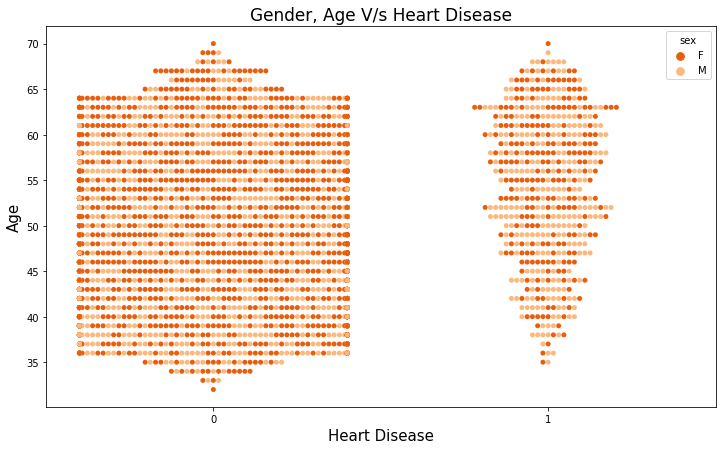

In [ ]:
# Chart - 1 visualization code

#Swarm Plot Creation of Gender, Age based Heart disease risk 

plt.figure(figsize=(12,7))
sns.swarmplot(x='TenYearCHD', y='age', hue='sex', data=cvd_df, palette='Oranges_r')
plt.title('Gender, Age V/s Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

*Since ,the age_groups are further sub-divided into Male and Female. Swarmplot describes them in interpretable manner*

##### 2. What is/are the insight(s) found from the chart?

*The Elder_Age group has the highest risk of heart disease than the others ,out of it females are at a greater risk than men*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*Thorough check-up of eldery patients should be done, and focus should be given on female patients predominantly*

#### Chart - 2

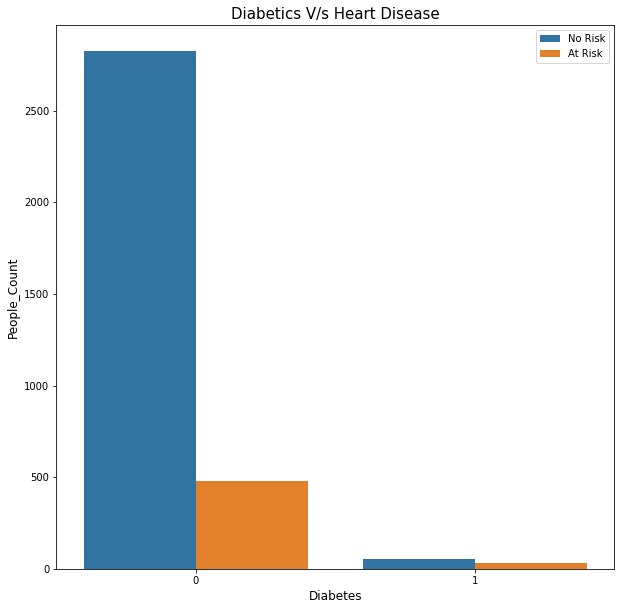

In [ ]:
# Chart - 2 visualization code

# Diabetes v/s heart disease
plt.figure(figsize = (10,10))
sns.countplot(x = cvd_df['diabetes'], hue = cvd_df['TenYearCHD'])
plt.title("Diabetics V/s Heart Disease", size =15)
plt.xlabel("Diabetes", size =12)
plt.ylabel("People_Count", size =12)
plt.legend(['No Risk','At Risk'])
plt.show()
     

[]

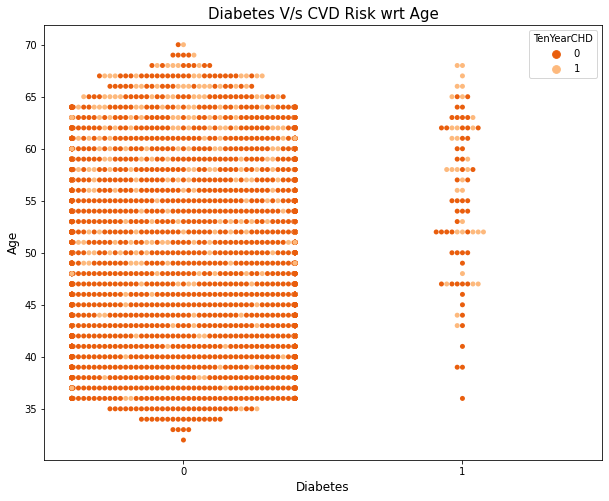

In [ ]:
plt.figure(figsize =(10, 8))
sns.swarmplot(x='diabetes', y='age', hue='TenYearCHD', data=cvd_df, palette='Oranges_r')
plt.title("Diabetes V/s CVD Risk wrt Age", size=15)
plt.xlabel("Diabetes", size=12)
plt.ylabel("Age", size=12)
plt.plot()

##### 1. Why did you pick the specific chart?

*To check the relation between diabetes and heart disease. Count plot gives a detailed insight into the same*

##### 2. What is/are the insight(s) found from the chart?

*Very less no of population have diabetes & it is clear that if a patient is non-diabetic , they surely don't possess a risk of CHD*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*For a diabetic patient , cholestrol levels should be checked for further conclusion*

#### Chart - 3

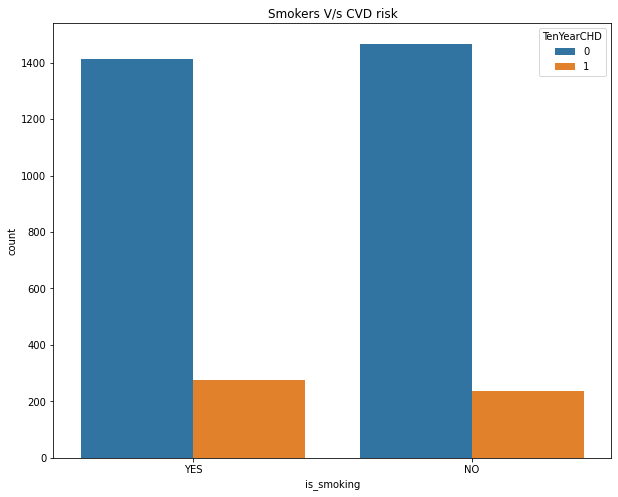

In [ ]:
# Chart - 3 visualization code

# Smokers V/s CVD Risk
plt.figure(figsize = (10,8))
sns.countplot(x = cvd_df['is_smoking'], hue = cvd_df['TenYearCHD'])
plt.title("Smokers V/s CVD risk")
plt.show()
     

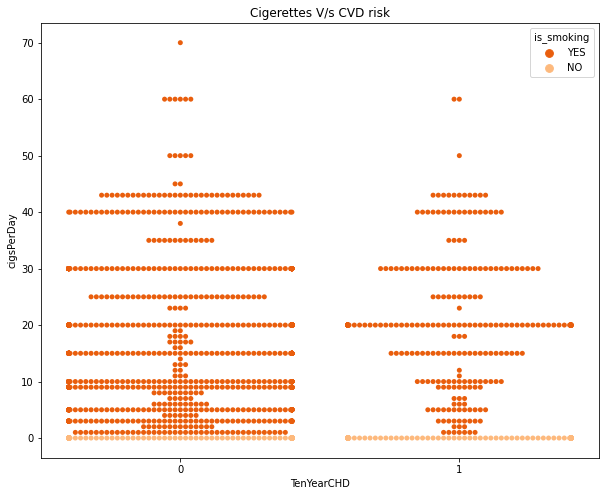

In [ ]:
# Cigerettes per day V/s CVD risk
plt.figure(figsize = (10,8))
sns.swarmplot(x='TenYearCHD', y='cigsPerDay', hue='is_smoking', data=cvd_df, palette='Oranges_r')
plt.title("Cigerettes V/s CVD risk")
plt.show()

##### 1. Why did you pick the specific chart?

*To check realtion between smokers and CHD risk ,since both have binary results, countplot describes the values in a better way*

##### 2. What is/are the insight(s) found from the chart?

*A very less no. of population are constant smokers . While smokers are definitely at a risk of a heart disease ,a considerable amount of non-smokers also have CHD risk*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*Smoking should not be directly linked with a heart disease .Other factors should be checked before final conclusion*

#### Chart - 4

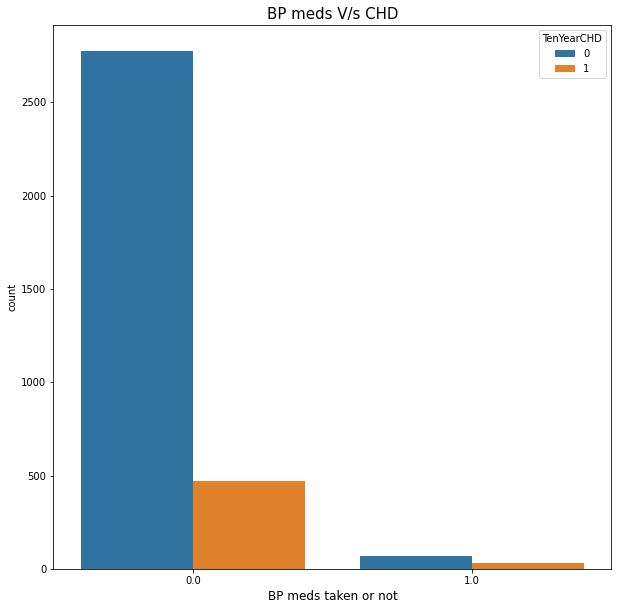

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize = (10,10))
sns.countplot(x = cvd_df['BPMeds'], hue = cvd_df['TenYearCHD'])
plt.title("BP meds V/s CHD", size=15)
plt.xlabel("BP meds taken or not", size=12)
plt.show()

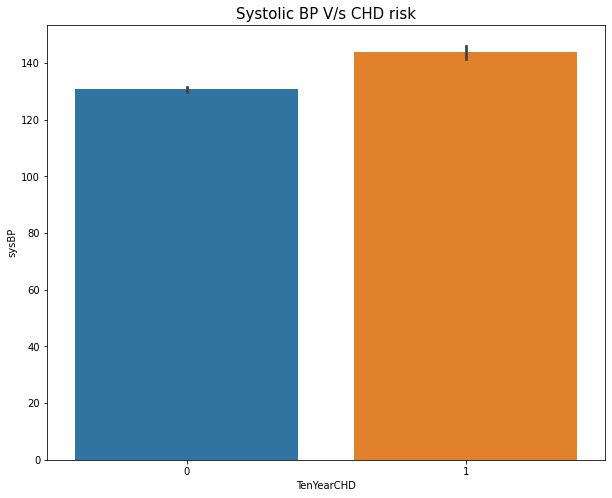

In [ ]:
# Systolic BP V/s CVD risk
plt.figure(figsize = (10,8))
sns.barplot(x = cvd_df['TenYearCHD'], y = cvd_df['sysBP'])
plt.title("Systolic BP V/s CHD risk", size=15)
plt.show()

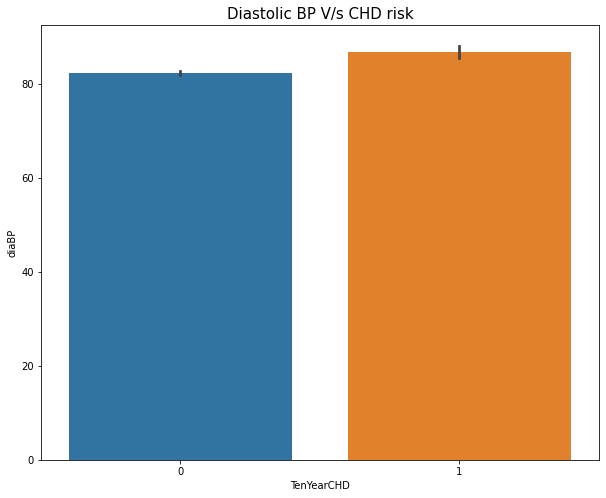

In [ ]:
# Diastolic BP V/s CVD risk
plt.figure(figsize = (10,8))
sns.barplot(x = cvd_df['TenYearCHD'], y = cvd_df['diaBP'])
plt.title("Diastolic BP V/s CHD risk", size=15)
plt.show()

In [ ]:
cvd_df['Hypertension'].value_counts()

Stage_2               1034
Normal BP              942
Stage_1                935
Elevated BP            334
Crisis                 143
Isolated Diastolic       2
Name: Hypertension, dtype: int64

##### 1. Why did you pick the specific chart?

*To check realtion between BP Medicines taken, BP and CVD risk, countplot & barplot describe the values in best way*

##### 2. What is/are the insight(s) found from the chart?

*No significant relation between BP Medicines taken and Heart disease, ,though patients with systolic BP > 140 & diastolic BP > 90 have extremely high risk of CHD*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*Dataset contains significant amount of patients needing immediate medical attention, based on their Systolic & Diastolic BP*

#### Chart - 5

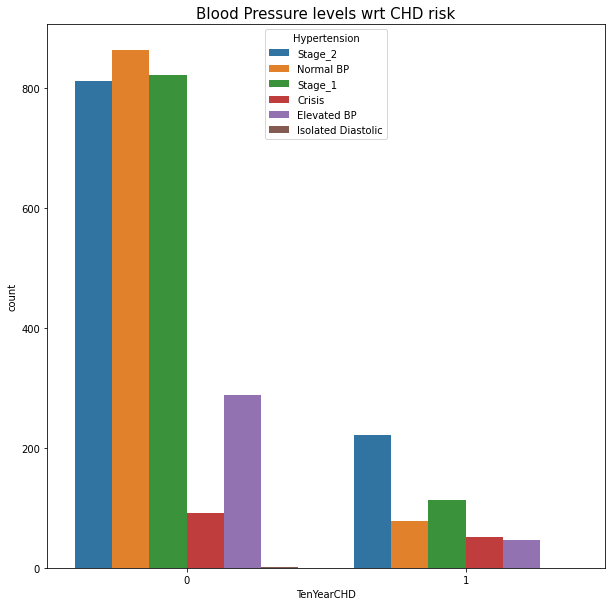

In [ ]:
# Chart - 5 visualization code

# Prevalent Hypertension V/s CVD risk
plt.figure(figsize = (10,10))
sns.countplot(hue = cvd_df['Hypertension'], x = cvd_df['TenYearCHD'])
plt.title("Blood Pressure levels wrt CHD risk", size =15)
plt.show()

Text(0.5, 1.0, 'Prevalent Hypertension V/s CHD risk')

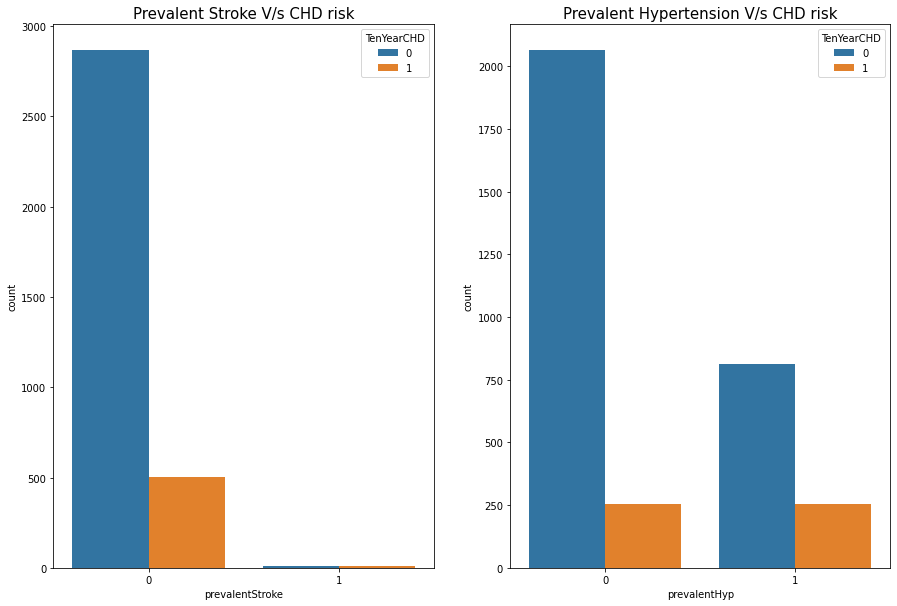

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

sns.countplot(ax=axes[0], x = cvd_df['prevalentStroke'], hue = cvd_df['TenYearCHD'])
axes[0].set_title("Prevalent Stroke V/s CHD risk", size=15)

sns.countplot(ax=axes[1], x = cvd_df['prevalentHyp'], hue = cvd_df['TenYearCHD'])
axes[1].set_title("Prevalent Hypertension V/s CHD risk", size=15)

##### 1. Why did you pick the specific chart?

*To check realtion between Prevalent Hypertension and CVD risk,barplot describe the values in best way*

##### 2. What is/are the insight(s) found from the chart?

While significant number of patients are not at risk of CHD, high Blood Pressure levels are linked with a risk of CHD

* Prevalent Hypertension --> ( Systolic BP > 140 mm Hg & Diastolic Hypertension > 90 mm Hg
* People with Prevalent Hypertension have extremely high risk of Heart disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*From systolic BP , Diastolic BP, Prevalent Hypertension graph we can conclude that , immediate treatment should be given to people with prevalent hypertension or any symptoms of the same*

#### Chart - 6

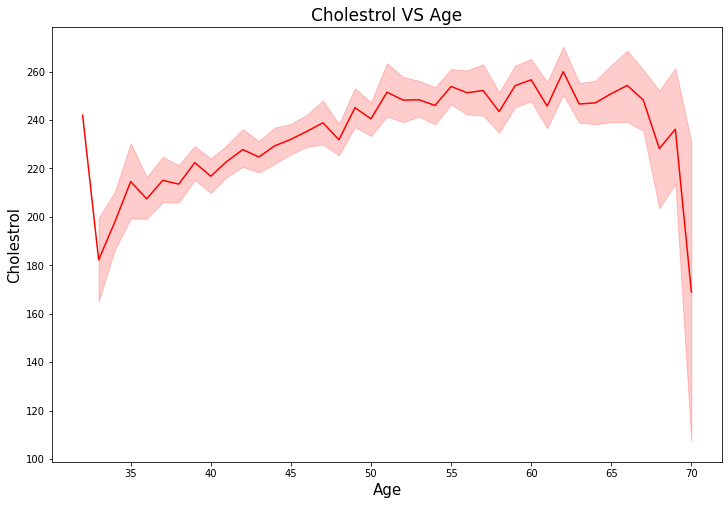

In [ ]:
# Chart - 6 visualization code

plt.figure(figsize=(12,8))
sns.lineplot(x='age', y='totChol', data=cvd_df, color='r')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

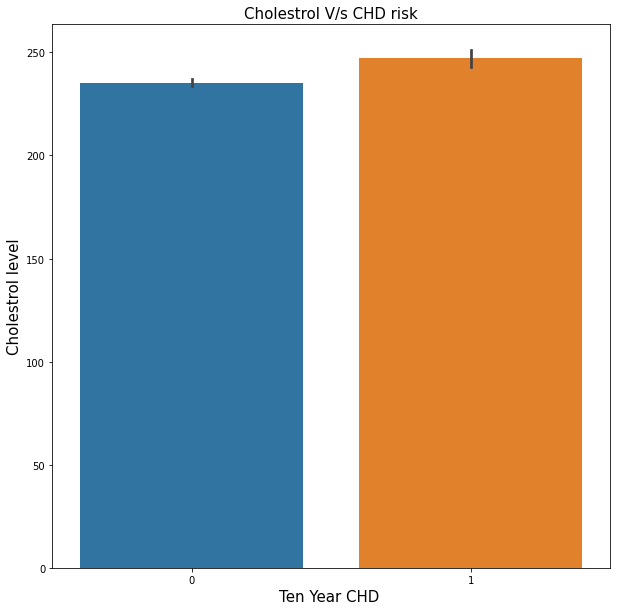

In [ ]:
# Prevalent Hypertension V/s CVD risk
plt.figure(figsize = (10,10))
sns.barplot(x = cvd_df['TenYearCHD'], y = cvd_df['totChol'])
plt.title("Cholestrol V/s CHD risk", fontsize =15)
plt.xlabel("Ten Year CHD ", fontsize =15)
plt.ylabel("Cholestrol level", fontsize =15)
plt.show()

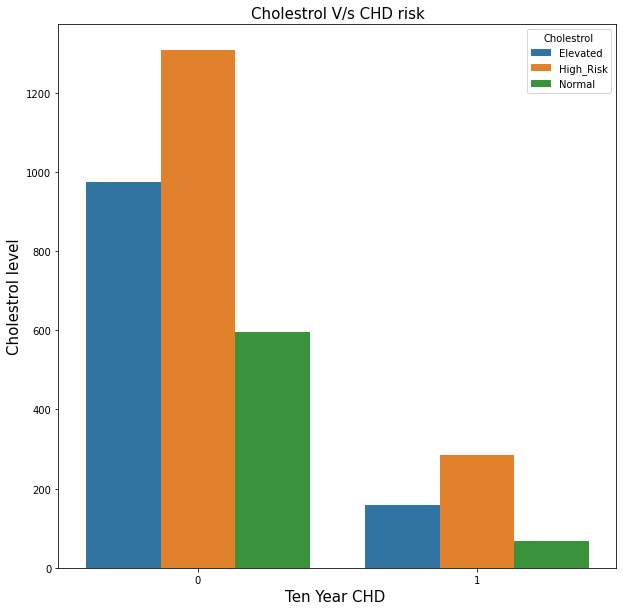

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(x = cvd_df['TenYearCHD'], hue = cvd_df['Cholestrol'])
plt.title("Cholestrol V/s CHD risk", fontsize =15)
plt.xlabel("Ten Year CHD ", fontsize =15)
plt.ylabel("Cholestrol level", fontsize =15)
plt.show()

In [ ]:
cvd_df['Cholestrol'].value_counts()

High_Risk    1594
Elevated     1133
Normal        663
Name: Cholestrol, dtype: int64

##### 1. Why did you pick the specific chart?

*Line plot and barplot are used to understand relation between Cholestrol level and CHD risk*

##### 2. What is/are the insight(s) found from the chart?

*Cholestrol level goes on increasing with the age and ,correspondingly the risk of CHD also increases*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*People should be advised to bring a change in lifestyle when their cholestrol level is high*

#### Chart - 7

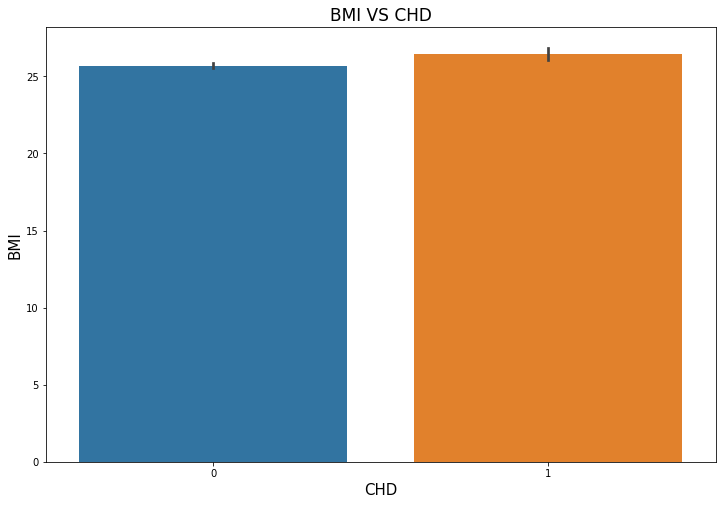

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize=(12,8))
sns.barplot(y='BMI', x='TenYearCHD', data=cvd_df)
plt.title('BMI VS CHD', fontsize=17)
plt.xlabel('CHD', fontsize=15)
plt.ylabel('BMI', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

*To get a realtionship between BMI and CHD, Since one is binary and other is continuous*

##### 2. What is/are the insight(s) found from the chart?

*High level of BMI is associated with increasing risk of CHD*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*Patients should be advised to keep their BMI index in check*

#### Chart - 8

In [ ]:
cvd_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'Age_Group',
       'Hypertension', 'Cholestrol'],
      dtype='object')

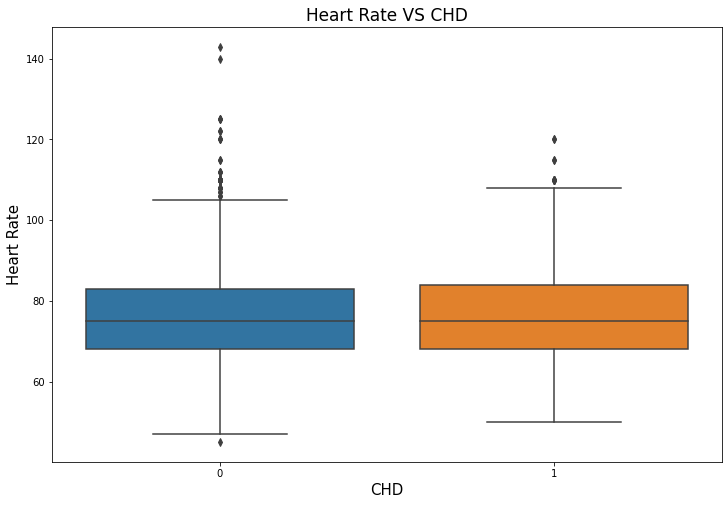

In [ ]:
# Chart - 8 visualization code

plt.figure(figsize=(12,8))
sns.boxplot(x='TenYearCHD', y='heartRate', data=cvd_df)
plt.title('Heart Rate VS CHD', fontsize=17)
plt.xlabel('CHD', fontsize=15)
plt.ylabel('Heart Rate', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

*Boxplot describes the heart-rate range and relation with CHD*

##### 2. What is/are the insight(s) found from the chart?

*Though high heart-rate is usually linked with high risk of CHD, the data is influenced by the outliers to get a detailed insight*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 9

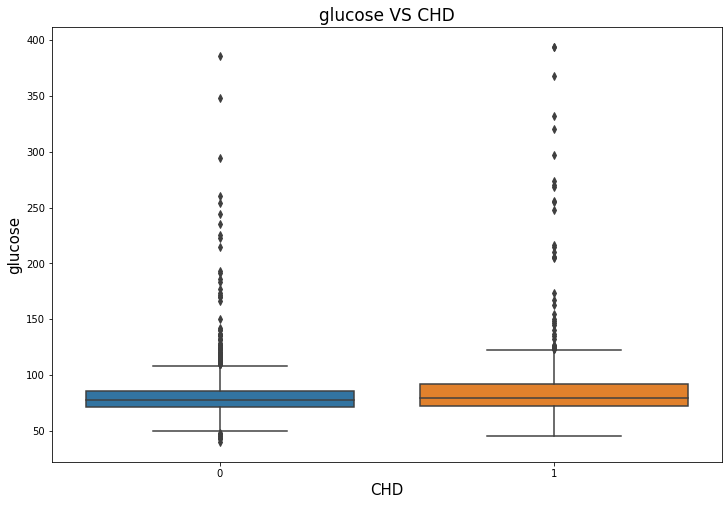

In [ ]:
# Chart - 9 visualization code

plt.figure(figsize=(12,8))
sns.boxplot(x='TenYearCHD', y ='glucose', data=cvd_df)
plt.title('glucose VS CHD', fontsize=17)
plt.xlabel('CHD', fontsize=15)
plt.ylabel('glucose', fontsize=15)
plt.show()

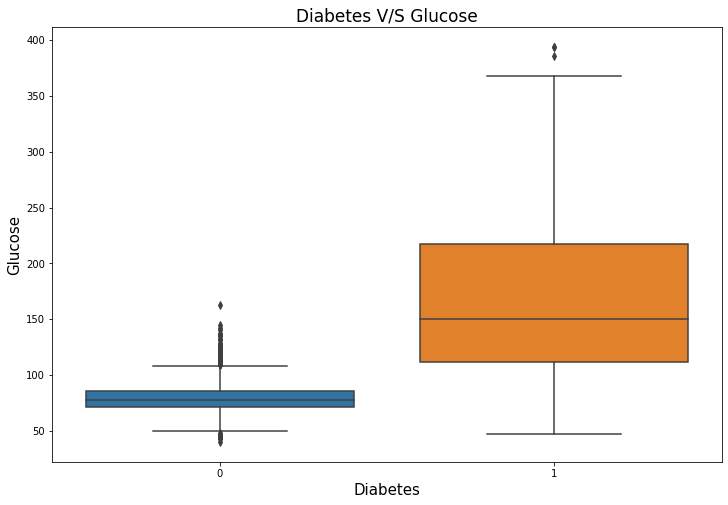

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='diabetes', y ='glucose', data=cvd_df)
plt.title('Diabetes V/S Glucose', fontsize=17)
plt.xlabel('Diabetes', fontsize=15)
plt.ylabel('Glucose', fontsize=15)
plt.show()

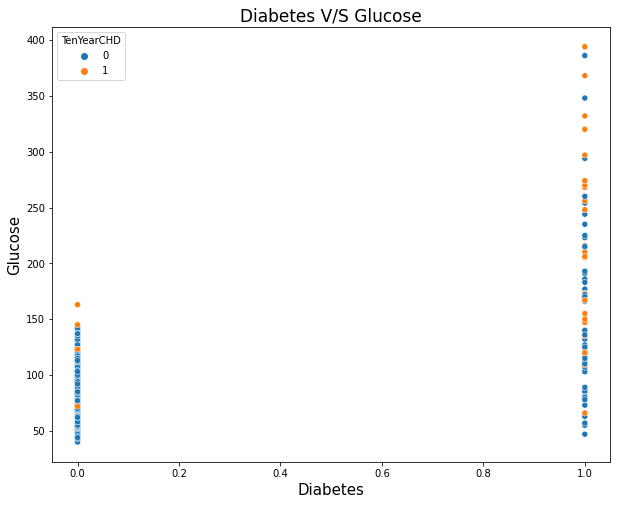

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(hue='TenYearCHD', y='glucose', x='diabetes', data=cvd_df)
plt.title('Diabetes V/S Glucose', fontsize=17)
plt.xlabel('Diabetes', fontsize=15)
plt.ylabel('Glucose', fontsize=15)
plt.show()


##### 1. Why did you pick the specific chart?

*Box-plot best describes the relation between th countinuous & binary values, whereas scatter plot sums up the relation between all 3 variables in one plot*

##### 2. What is/are the insight(s) found from the chart?

*The relationship between Glucose and CHD is heavily inifluenced by outliers, but the relation between glucose and diabetes points out that high glucose levels are associated with increased risk of diabetes and high diabetes is linked with a CHD risk*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*Patients should be advised to keep glucose levels within stipulated limits , and have regular check-ups of diabetes*

#### Chart - 10

In [ ]:
cvd_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'Age_Group',
       'Hypertension', 'Cholestrol'],
      dtype='object')

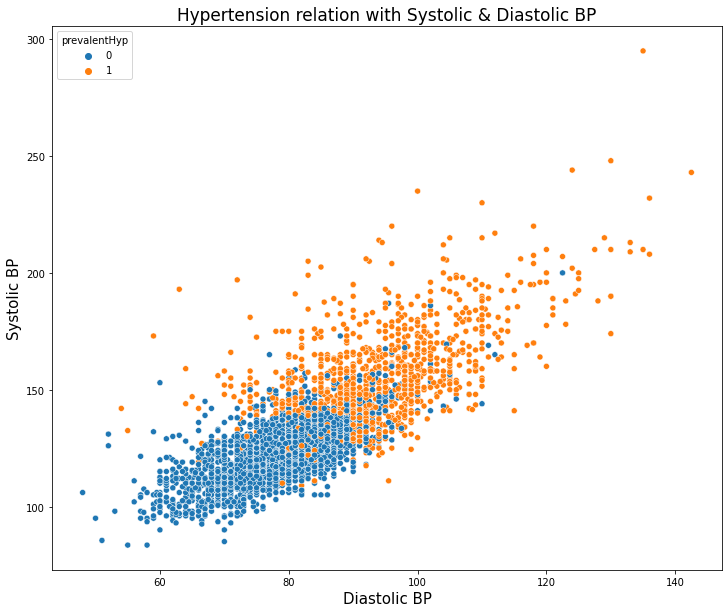

In [ ]:
# Chart - 10 visualization code


plt.figure(figsize=(12,10))
sns.scatterplot(hue='prevalentHyp', x='diaBP', y='sysBP', data=cvd_df)
plt.title('Hypertension relation with Systolic & Diastolic BP', fontsize=17)
plt.xlabel('Diastolic BP', fontsize=15)
plt.ylabel('Systolic BP', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

*Scatter pplot gives relationship bbetween Systolic BP, Diastolic BP & Prevalent Hypertension*

##### 2. What is/are the insight(s) found from the chart?

*High levels of Systolic BP & Diastolic BP are linked with risk of Prevalent Hypertension , which is a clear risk of CHD*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*Same treatment/medication as for High BP*

#### Chart - 14 - Correlation Heatmap

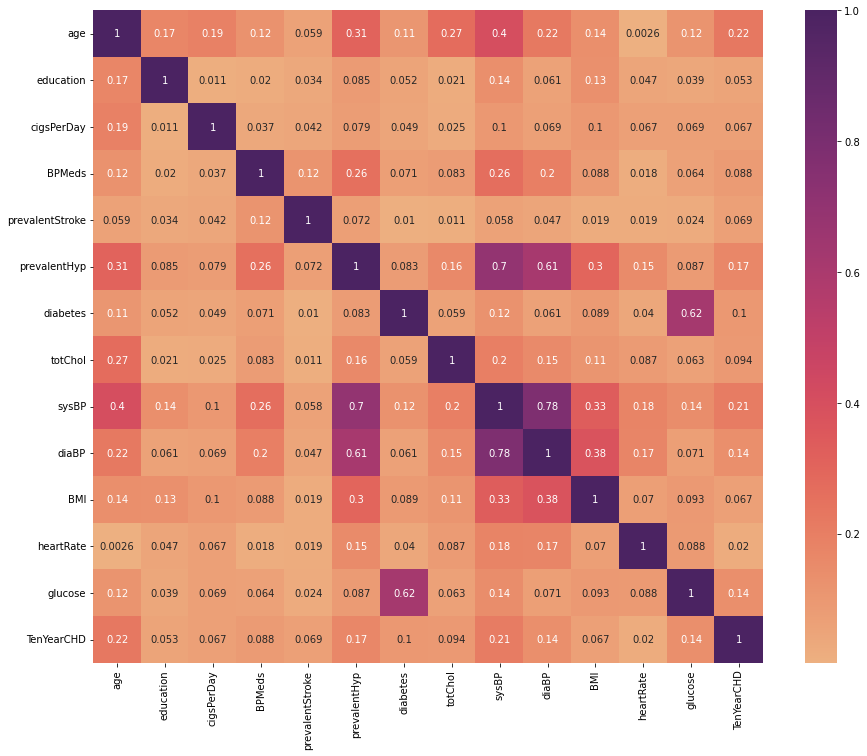

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize = (15,12))
correlation = cvd_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap = 'flare')

##### 1. Why did you pick the specific chart?

*Heatmap determines correlation between all variables*

##### 2. What is/are the insight(s) found from the chart?

*Some features are highly correlated , due to same measures, usage and their link with CHD risk*

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
#sns.pairplot(cvd_df[1:], hue='Age_Group')

##### 1. Why did you pick the specific chart?

*Pairplot gives a detailed visualization of realation between all the features*

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

In [ ]:
# drop null values
cvd_df.dropna(inplace =True)

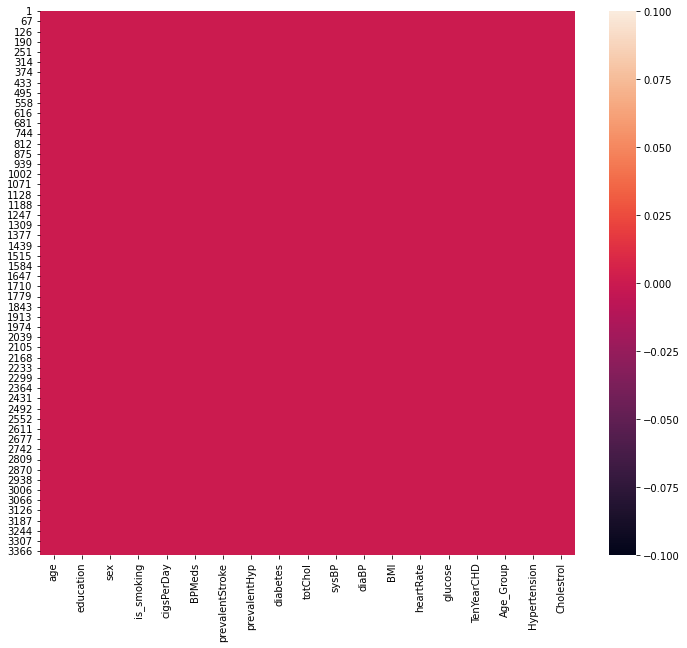

In [ ]:
missing_val = cvd_df.isnull()
plt.figure(figsize = (12, 10))
sns.heatmap(missing_val)

#### What all missing value imputation techniques have you used and why did you use those techniques?

*All the null values are dropped*

### 2. Handling Outliers

In [ ]:
# Lets check the discrete and continuous features
categorical_features = [i for i in cvd_df.columns if cvd_df[i].nunique()<=4]
numeric_features = [i for i in cvd_df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD', 'Age_Group', 'Cholestrol']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Hypertension']


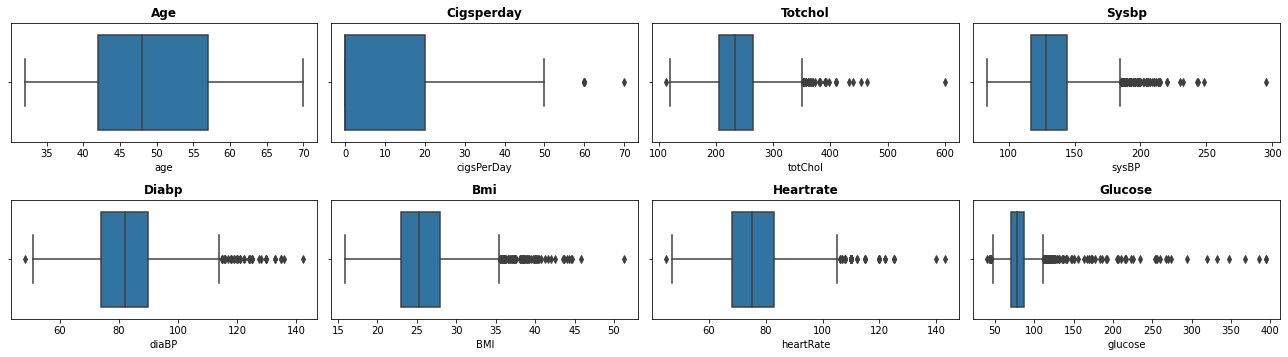

In [ ]:
plt.figure(figsize=(18,12))
for n,column in enumerate(numerical_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(cvd_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:

for col in numerical_features:
  # Using IQR method to define the range of inliners:
  q1, q3, median = cvd_df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  cvd_df[col] = np.where(cvd_df[col] > upper_limit, median,np.where(
                         cvd_df[col] < lower_limit,median,cvd_df[col]))

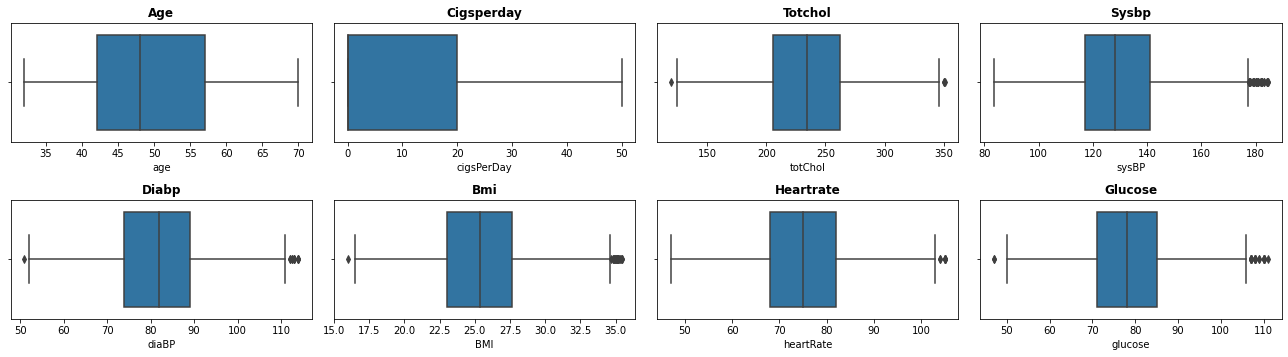

In [ ]:
plt.figure(figsize=(18,12))
for n,column in enumerate(numerical_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(cvd_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

#### Which method was used for handling outliers and why ?

* *Inter-quartile range (IQR) method was used for treatment of outliers. Since,it shows how the data is distribubted around the median* 

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
categorical_features


['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD',
 'Age_Group',
 'Cholestrol']

In [ ]:
for col in ['sex', 'is_smoking']:
  print(cvd_df[col].value_counts(),'\n')

F    1553
M    1275
Name: sex, dtype: int64 

NO     1416
YES    1412
Name: is_smoking, dtype: int64 



In [ ]:
encoder = {'sex':{'M':1, 'F':0},
           'is_smoking':{'YES':1, 'NO': 0},
           }

# Label Encoding
cvd_df = cvd_df.replace(encoder)

In [ ]:
cvd_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age_Group,Hypertension,Cholestrol
1,36.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Young Age,Stage_2,Elevated
2,46.0,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,Middle Age,Normal BP,High_Risk
3,50.0,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Middle Age,Stage_2,Elevated
4,64.0,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,Elder Age,Stage_1,High_Risk
5,61.0,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,82.0,32.80,85.0,65.0,1,Elder Age,Crisis,High_Risk


#### What all categorical encoding techniques have you used & why did you use those techniques?

*Label Encoding to convert variables with double categorical values into binary format*

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   #return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))
 
   return vif

In [ ]:
calc_vif(cvd_df[[i for i in cvd_df.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,age,41.091212
1,education,4.760315
2,sex,2.235897
3,is_smoking,5.196990
4,cigsPerDay,4.495991
5,BPMeds,1.140151
6,prevalentStroke,1.026718
7,prevalentHyp,2.316253
8,diabetes,1.050972
9,totChol,37.223952


In [ ]:
calc_vif(cvd_df[[i for i in cvd_df.describe().columns if i not in ['TenYearCHD','glucose', 'sysBP', 'diaBP', 'education', 'id', 'BMI', 'totChol', 'heartRate']]])

,variables,VIF
0,age,3.096135
1,sex,2.052534
2,is_smoking,5.035792
3,cigsPerDay,4.458983
4,BPMeds,1.126672
5,prevalentStroke,1.023499
6,prevalentHyp,1.685993
7,diabetes,1.044081


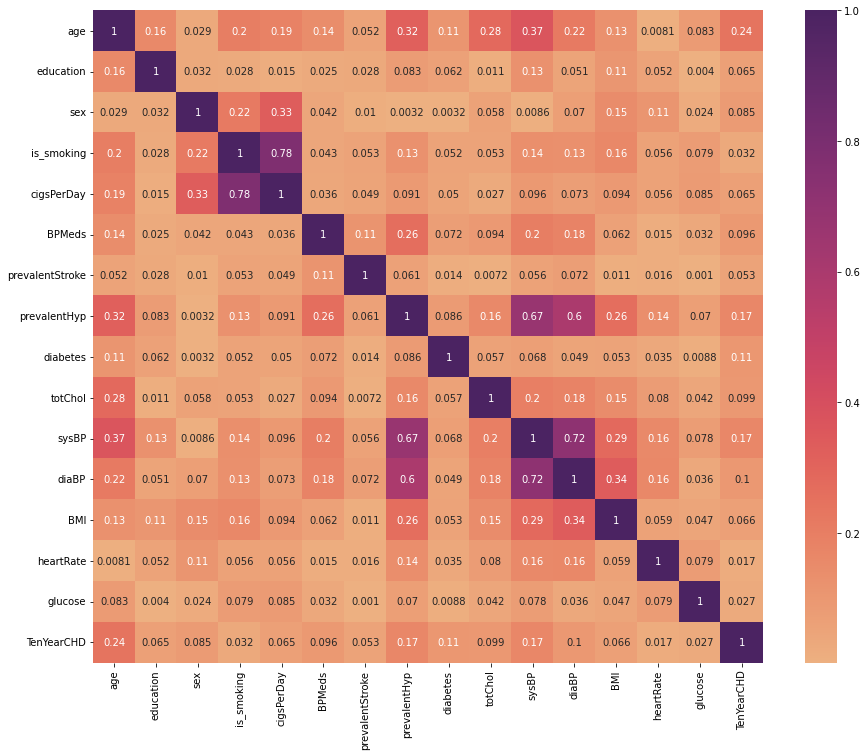

In [ ]:
plt.figure(figsize = (15,12))
correlation = cvd_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap = 'flare')

#### 2. Feature Selection

In [ ]:
cvd_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'Age_Group',
       'Hypertension', 'Cholestrol'],
      dtype='object')

In [ ]:
pair_df = [cvd_df[['age','sex', 'heartRate','prevalentStroke','is_smoking', 'cigsPerDay', 'BPMeds',]],
           pd.get_dummies(cvd_df[['Age_Group', 'Hypertension','Cholestrol']], drop_first=False), 
           cvd_df['TenYearCHD']
           ]
one_hot_df = pd.concat(pair_df, axis=1)
one_hot_df.head()

,age,sex,heartRate,prevalentStroke,is_smoking,cigsPerDay,BPMeds,Age_Group_Elder Age,Age_Group_Middle Age,Age_Group_Young Age,Hypertension_Crisis,Hypertension_Elevated BP,Hypertension_Isolated Diastolic,Hypertension_Normal BP,Hypertension_Stage_1,Hypertension_Stage_2,Cholestrol_Elevated,Cholestrol_High_Risk,Cholestrol_Normal,TenYearCHD
1,36.0,1,72.0,0,0,0.0,0.0,0,0,1,0,0,0,0,0,1,1,0,0,0
2,46.0,0,88.0,0,1,10.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,50.0,1,68.0,0,1,20.0,0.0,0,1,0,0,0,0,0,0,1,1,0,0,1
4,64.0,0,70.0,0,1,30.0,0.0,1,0,0,0,0,0,0,1,0,0,1,0,0
5,61.0,0,85.0,0,0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,1


In [ ]:
# Select your features wisely to avoid overfitting

one_hot_df.columns

Index(['age', 'sex', 'heartRate', 'prevalentStroke', 'is_smoking',
       'cigsPerDay', 'BPMeds', 'Age_Group_Elder Age', 'Age_Group_Middle Age',
       'Age_Group_Young Age', 'Hypertension_Crisis',
       'Hypertension_Elevated BP', 'Hypertension_Isolated Diastolic',
       'Hypertension_Normal BP', 'Hypertension_Stage_1',
       'Hypertension_Stage_2', 'Cholestrol_Elevated', 'Cholestrol_High_Risk',
       'Cholestrol_Normal', 'TenYearCHD'],
      dtype='object')

In [ ]:
features = [i for i in one_hot_df.columns if i not in ['TenYearCHD']]

In [ ]:
features

['age',
 'sex',
 'heartRate',
 'prevalentStroke',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'Age_Group_Elder Age',
 'Age_Group_Middle Age',
 'Age_Group_Young Age',
 'Hypertension_Crisis',
 'Hypertension_Elevated BP',
 'Hypertension_Isolated Diastolic',
 'Hypertension_Normal BP',
 'Hypertension_Stage_1',
 'Hypertension_Stage_2',
 'Cholestrol_Elevated',
 'Cholestrol_High_Risk',
 'Cholestrol_Normal']

In [ ]:
X = one_hot_df[features]
y = one_hot_df['TenYearCHD']

##### What all feature selection methods have you used  and why?

*One-hot-df method is used for feature selection , since some of the categorical features were to be encoded in binary format*

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

*Class 0 contained 2398 values , whereas Class 1 contained only 430 values. This is due to the fact that, not many people suffer form a risk of CHD. Hence, the data is imbalanced*

In [ ]:
# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
under = RandomUnderSampler()
over = SMOTE()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

{0: 2398, 1: 430} {0: 2398, 1: 2398}


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

*SMOTE analysis was used for handling Class Imbalance. Since, it helps to handle the Overfitting problem*

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state=0)

##### What data splitting ratio have you used and why? 

* Splitting ratio of 70-30 was used , since data was focused on medical condition of the patients . Hence, more focus should be given on training the data well*

### 6. Data Scaling

In [ ]:
# Feature Scaling 
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features = scaler.transform(X_train)

##### Which method have you used to scale you data and why?

*Standard Scaler method is used , our data is mostly normally distributed and Standardization mantains useful information about outliers and makes the algorithm less sensitive to them.*

## ***6. ML Model Implementation***

### ML Model - 1 : Logistic Regression

In [ ]:
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.86
Test set score: 0.85


In [ ]:
y_train_pred = lr.predict(X_train)

In [ ]:
y_pred_lr = lr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       703
           1       0.95      0.75      0.84       736

    accuracy                           0.85      1439
   macro avg       0.87      0.85      0.85      1439
weighted avg       0.87      0.85      0.85      1439



In [ ]:
print(roc_auc_score(y_test, y_pred_lr))

0.8523360674747975


[[1613   82]
 [ 385 1277]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

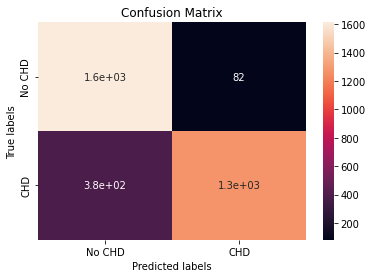

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[674  29]
 [187 549]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

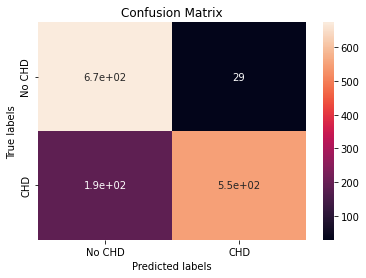

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

AUC for our classifier is: 0.9299614617477892


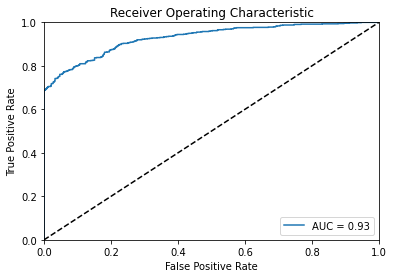

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

class_probabilities = lr.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Model Performance 
lr_accuracy = accuracy_score(y_pred_lr, y_test)
lr_precision = precision_score(y_pred_lr ,y_test, average ='weighted')
lr_recall = recall_score(y_pred_lr, y_test, average ='weighted')
lr_f1_score = f1_score(y_pred_lr,y_test,average ='weighted')
print(' Accuracy:',lr_accuracy,'\n','Predicion :' ,lr_precision, '\n', 'Recall :',lr_recall, '\n', 'F1_score :', lr_f1_score)

 Accuracy: 0.8498957609451008 
 Predicion : 0.8732635446840146 
 Recall : 0.8498957609451008 
 F1_score : 0.8513383012066429


### ML Model - 2 : Naive Bayes Classification

In [ ]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

In [ ]:
print("Training set score: {:.2f}".format(nbc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(nbc.score(X_test, y_test)))

Training set score: 0.71
Test set score: 0.72


In [ ]:
pred_train_nbc = nbc.predict(X_train)

In [ ]:
y_pred_nbc = nbc.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print(classification_report(y_test, y_pred_nbc))

              precision    recall  f1-score   support

           0       0.84      0.53      0.65       703
           1       0.67      0.90      0.77       736

    accuracy                           0.72      1439
   macro avg       0.75      0.71      0.71      1439
weighted avg       0.75      0.72      0.71      1439



[[ 889  806]
 [ 174 1488]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

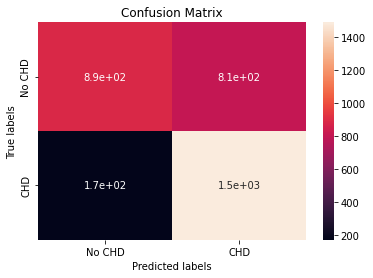

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_train, pred_train_nbc)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[370 333]
 [ 72 664]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

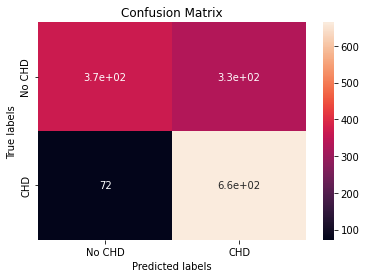

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_test, y_pred_nbc)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

AUC for our classifier is: 0.8355601382274722


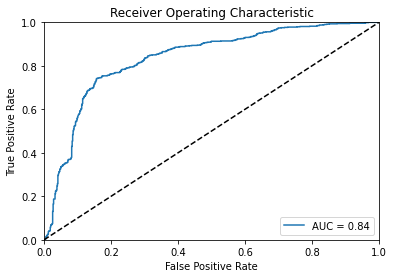

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

class_probabilities = nbc.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 2. Cross-validation & Hyperparameter tuning

In [ ]:
param_grid_nb = {                                                                # var_smoothing --> smothen the curve to account for more samples whihc are further away from mean
    'var_smoothing': np.logspace(0,-9, num=100)                                  # returns numbers spaced evenly on a log scale , starts from 0, ends at -9, generates 100 samples 
}

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nb_grid = GridSearchCV(estimator= nbc, 
                       param_grid=param_grid_nb, 
                       verbose=1, 
                       cv=10, 
                       n_jobs=-1,
                       scoring = 'f1_micro')
nb_grid.fit(X_train, y_train)
print(nb_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0001519911082952933)


In [ ]:
print("Training set score: {:.2f}".format(nb_grid.score(X_train, y_train)))
print("Test set score: {:.2f}".format(nb_grid.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.77


In [ ]:
pred_train_nbc = nb_grid.predict(X_train)

In [ ]:
 y_pred_gnbc= nb_grid.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_gnbc))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       703
           1       0.74      0.84      0.78       736

    accuracy                           0.77      1439
   macro avg       0.77      0.76      0.76      1439
weighted avg       0.77      0.77      0.76      1439



[[1193  502]
 [ 286 1376]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

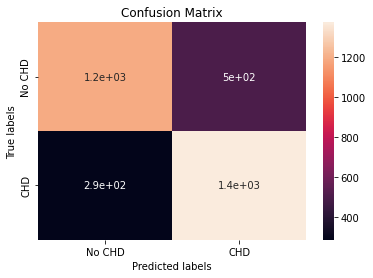

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_train, pred_train_nbc)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[486 217]
 [121 615]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

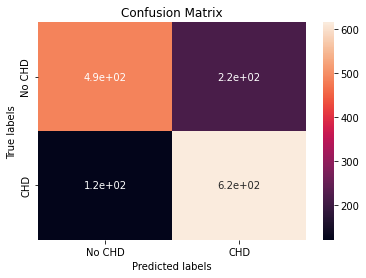

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_test, y_pred_gnbc)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Precision , Recall , F1 score for the model
nb_accuracy = accuracy_score(y_pred_gnbc, y_test)
nb_precision = precision_score(y_pred_gnbc ,y_test, average ='weighted')
nb_recall = recall_score(y_pred_gnbc, y_test, average ='weighted')
nb_f1_score = f1_score(y_pred_gnbc,y_test,average ='weighted')
print(' Accuracy:',nb_accuracy,'\n','Predicion :' ,nb_precision, '\n', 'Recall :',nb_recall, '\n', 'F1_score :', nb_f1_score)

 Accuracy: 0.7651146629603892 
 Predicion : 0.7747396752792376 
 Recall : 0.7651146629603892 
 F1_score : 0.7665307811319786


### ML Model - 3 : Support Vector Machines Classification

In [ ]:
svm = SVC(random_state=0, probability =True)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [ ]:
print("Training set score: {:.2f}".format(svm.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svm.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [ ]:
pred_train_svm = svm.predict(X_train)

In [ ]:
y_pred_svm = svm.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       703
           1       0.67      0.65      0.66       736

    accuracy                           0.66      1439
   macro avg       0.66      0.66      0.66      1439
weighted avg       0.66      0.66      0.66      1439



[[1096  599]
 [ 525 1137]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

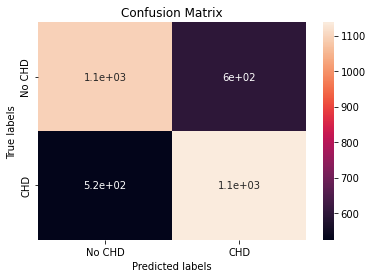

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_train, pred_train_svm)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[461 242]
 [254 482]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

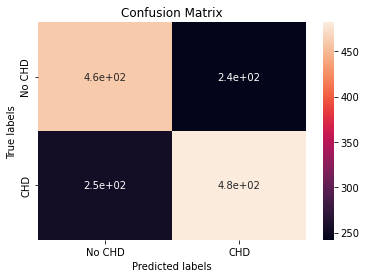

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

AUC for our classifier is: 0.71977916847053


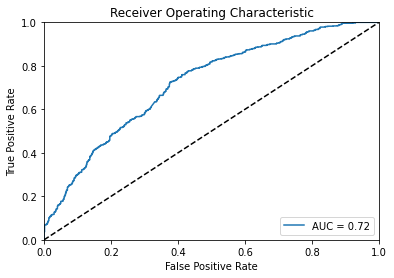

In [ ]:

class_probabilities = svm.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 2. Cross-validation & Hyperparameter tuning

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   1.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.680 total time=   0.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.692 total time=   0.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.726 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.681 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.695 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid_svm.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_svm.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [ ]:
print("Training set score: {:.2f}".format(grid_svm.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_svm.score(X_test, y_test)))

Training set score: 0.88
Test set score: 0.86


In [ ]:
pred_train_svm = grid_svm.predict(X_train)

In [ ]:
y_pred_gsvm = grid_svm.predict(X_test)

In [ ]:
print(roc_auc_score(y_test, y_pred_gsvm))

0.859808893561754


In [ ]:
print(classification_report(y_test, y_pred_gsvm))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       703
           1       0.95      0.76      0.85       736

    accuracy                           0.86      1439
   macro avg       0.87      0.86      0.86      1439
weighted avg       0.87      0.86      0.86      1439



[[1644   51]
 [ 353 1309]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

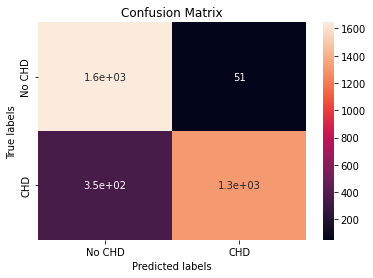

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_train, pred_train_svm)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[674  29]
 [176 560]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

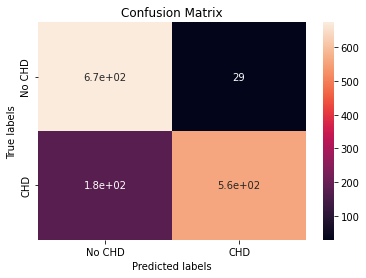

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_test, y_pred_gsvm)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Precision , Recall , F1 score for the model
svm_accuracy = accuracy_score(y_pred_gsvm, y_test)
svm_precision = precision_score(y_pred_gsvm ,y_test, average ='weighted')
svm_recall = recall_score(y_pred_gsvm, y_test, average ='weighted')
svm_f1_score = f1_score(y_pred_gsvm,y_test,average ='weighted')
print(' Accuracy:',svm_accuracy,'\n','Predicion :' ,svm_precision, '\n', 'Recall :',svm_recall, '\n', 'F1_score :', svm_f1_score)

 Accuracy: 0.857539958304378 
 Predicion : 0.8777541087791818 
 Recall : 0.857539958304378 
 F1_score : 0.8587001451022909


### Model -4 : Random Forest Classification

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=30)

In [ ]:
print("Training set score: {:.2f}".format(rfc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rfc.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.89


In [ ]:
pred_train_rfc = rfc.predict(X_train)

In [ ]:
y_pred_rfc = rfc.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print(roc_auc_score(y_test, y_pred_rfc))

0.8876399282577772


In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       703
           1       0.92      0.85      0.88       736

    accuracy                           0.89      1439
   macro avg       0.89      0.89      0.89      1439
weighted avg       0.89      0.89      0.89      1439



[[1682   13]
 [  54 1608]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

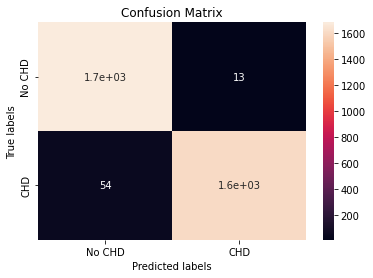

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_train, pred_train_rfc)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[652  51]
 [112 624]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

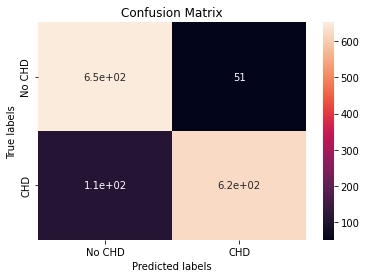

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_test, y_pred_rfc)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

AUC for our classifier is: 0.949506965489517


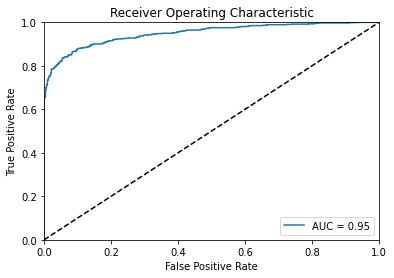

In [ ]:

class_probabilities = rfc.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Precision , Recall , F1 score for the model
rf_accuracy = accuracy_score(y_pred_rfc, y_test)
rf_precision = precision_score(y_pred_rfc ,y_test, average ='weighted')
rf_recall = recall_score(y_pred_rfc, y_test, average ='weighted')
rf_f1_score = f1_score(y_pred_rfc,y_test,average ='weighted')
print(' Accuracy:',rf_accuracy,'\n','Predicion :' ,rf_precision, '\n', 'Recall :',rf_recall, '\n', 'F1_score :', rf_f1_score)

 Accuracy: 0.886726893676164 
 Predicion : 0.8901023548566734 
 Recall : 0.886726893676164 
 F1_score : 0.8868203605138508


### Model -5 : XG-Boost Classification

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

In [ ]:
print("Training set score: {:.2f}".format(xgb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(xgb.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.86


In [ ]:
pred_train_xgb = xgb.predict(X_train)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       703
           1       0.94      0.78      0.85       736

    accuracy                           0.86      1439
   macro avg       0.87      0.86      0.86      1439
weighted avg       0.87      0.86      0.86      1439



[[1615   80]
 [ 303 1359]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

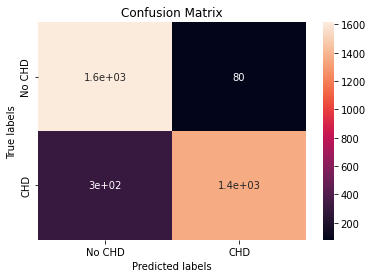

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_train, pred_train_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[664  39]
 [165 571]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

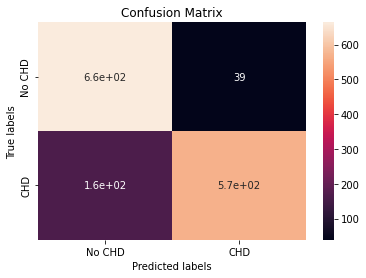

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

AUC for our classifier is: 0.9337128532995238


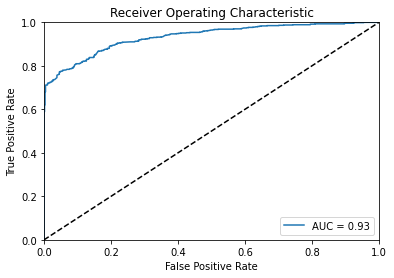

In [ ]:
class_probabilities = xgb.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Precision , Recall , F1 score for the model
xgb_accuracy = accuracy_score(y_pred_xgb, y_test)
xgb_precision = precision_score(y_pred_xgb ,y_test, average ='weighted')
xgb_recall = recall_score(y_pred_xgb, y_test, average ='weighted')
xgb_f1_score = f1_score(y_pred_xgb,y_test,average ='weighted')
print(' Accuracy:',xgb_accuracy,'\n','Predicion :' ,xgb_precision, '\n', 'Recall :',xgb_recall, '\n', 'F1_score :', xgb_f1_score)

 Accuracy: 0.8582348853370396 
 Predicion : 0.8730071160072569 
 Recall : 0.8582348853370396 
 F1_score : 0.8590404845661744


### Model-6 : KNN Classification

In [ ]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test) 

In [ ]:
# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [0.99463807 0.95352994 0.89395293 0.88620792 0.8489723  0.85314269
 0.82186476 0.82484361 0.79743819 0.79982127]
Test Accuracy:  [0.83738707 0.81862404 0.81028492 0.8019458  0.77970813 0.77553857
 0.76789437 0.75955525 0.74565671 0.75191105]


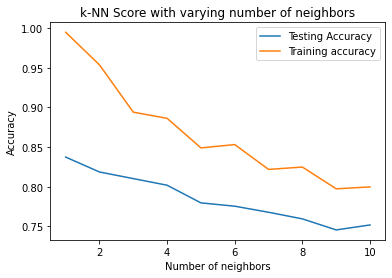

In [ ]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
     

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
              }

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=3, verbose=1, n_jobs=-1)
knn_cv.fit(X_train,y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
# best score and paramter from above options
print('best_score :',knn_cv.best_score_)
print(knn_cv.best_params_)


best_score : 0.8322907357759904
{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


In [ ]:
print("Training set score: {:.2f}".format(knn_cv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn_cv.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.86


In [ ]:
pred_train_knn = knn_cv.predict(X_train)

In [ ]:
y_pred_knn = knn_cv.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       703
           1       0.84      0.91      0.87       736

    accuracy                           0.86      1439
   macro avg       0.87      0.86      0.86      1439
weighted avg       0.87      0.86      0.86      1439



[[1695    0]
 [  16 1646]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

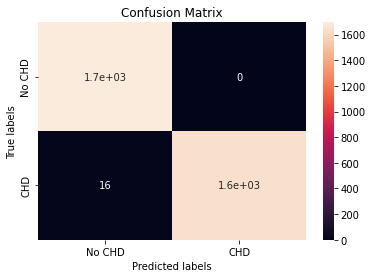

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_train, pred_train_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[572 131]
 [ 66 670]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

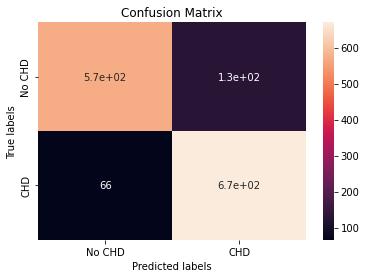

In [ ]:
labels = ['No CHD', 'CHD']
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

AUC for our classifier is: 0.8969227379553465


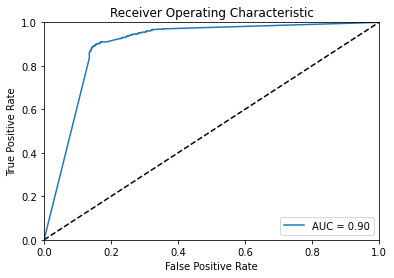

In [ ]:
# AUC-ROC curve
class_probabilities = knn_cv.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Precision , Recall , F1 score for the model
knn_accuracy = accuracy_score(y_pred_knn, y_test)
knn_precision = precision_score(y_pred_knn ,y_test, average ='weighted')
knn_recall = recall_score(y_pred_knn, y_test, average ='weighted')
knn_f1_score = f1_score(y_pred_knn,y_test,average ='weighted')
print(' Accuracy:',knn_accuracy,'\n','Predicion :' ,knn_precision, '\n', 'Recall :',knn_recall, '\n', 'F1_score :', knn_f1_score)

 Accuracy: 0.8630993745656707 
 Predicion : 0.8674659980441987 
 Recall : 0.8630993745656707 
 F1_score : 0.8635224737803279


### 1. Which Evaluation metrics did you consider for a positive business impact and why?


Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.

Metrics considered for evaluation are as follows :

* **Confusion Matrix**: a table showing correct predictions and types of incorrect predictions.
* **Precision**: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
* **Recall**: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
* **F1 Score**: the weighted average of precision and recall.
* **Area Under ROC Curve (AUC-ROC)**: AUC-ROC represents the likelihood of your model distinguishing observations from two classes. In other words, if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
result_df = pd.DataFrame({
    'Model': [ 'Logistic Regression','Naive-Bayes','Support Vector Machines','Random Forest','XGB-Classification','KNN-Classification'],
    'Test accuracy': [lr_accuracy, nb_accuracy, svm_accuracy,rf_accuracy, xgb_accuracy,knn_accuracy],
    'Precision': [ lr_precision, nb_precision, svm_precision, rf_precision,xgb_precision, knn_precision],
    'Recall': [ lr_recall, nb_recall, svm_recall,  rf_recall,xgb_recall, knn_recall],
    'F1-Score': [ lr_f1_score, nb_f1_score, svm_f1_score, rf_f1_score,xgb_f1_score, knn_f1_score]
    })
result_df

,Model,Test accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.849896,0.873264,0.849896,0.851338
1,Naive-Bayes,0.765115,0.774740,0.765115,0.766531
2,Support Vector Machines,0.857540,0.877754,0.857540,0.858700
3,Random Forest,0.886727,0.890102,0.886727,0.886820
4,XGB-Classification,0.858235,0.873007,0.858235,0.859040
5,KNN-Classification,0.863099,0.867466,0.863099,0.863522


*Considering the optimal values from the above table and auc_roc curve , Random Forest gives the best result*

### 3. Explain feature importance ?

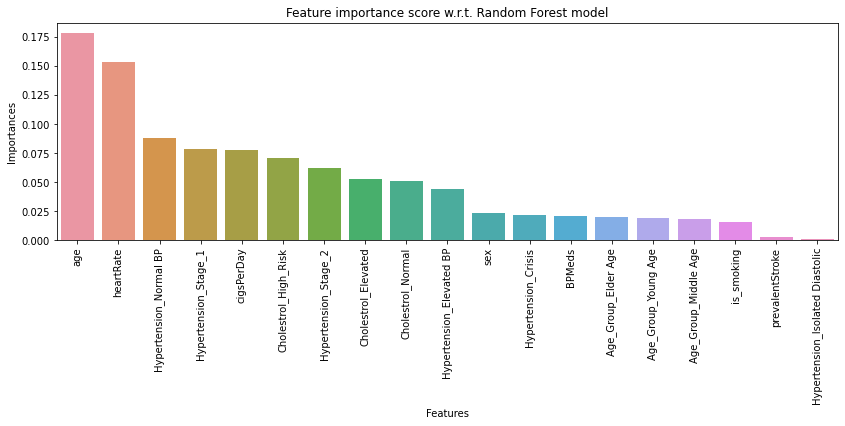

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rfc.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. Random Forest model')
plt.show()
     

*Age is the most important factor , when diagonising a patient related to CHD , followed by heart Rate. Hence, more focus be given on these factors*

# **Conclusion**

* 6 different Machine Learning algorithms were trained on training dataset 
* Random forest provided best results and thus classifying the patients with  an F1-score and test accuracy of 90 %
* To provide immediate treatment to the patients at arisk of CHD. Type II error should be low, i.e. High Recall value is desired
* To avoid time consumption on providing patients with CHD treatment ,when actually they don't have any. Type I error should be low, i.e. High Precision is desired.
* To treat patients with actual risk of CHD, there should be a balance between precision & recall. i.e. High F1-score is desirable , since it punishes the extreme values more.
* The models which provide the above desired results are as follows :
1. **Recall :** k-Nearest Neighbors
2. **Precision :** Support Vector Machines
3. **F1-score :** Random Forest
4. **Test Accuracy :** Random Forest

* Age is the deciding factors for the patients mentioned in the dataset, followed by heart_rate, cigerettes per day and cholestrol level.
* More focus should be given on the above mentioned features of the patients attending for treatment.
* Though count of patients not suffering from CHD is more, count of patients with risk of CHD is high.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***